In [1]:
import nbsetup
import numpy as np
import seaborn as sns
from helpers.entropy import ErgodicEnsemble

In [2]:
from mesa import Agent, Model
from mesa.time import RandomActivation


class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""
    def __init__(self, unique_id, model, initial):
        super().__init__(unique_id, model)
        self.wealth = initial
    
    def step(self):
        if self.wealth < 1:
            return
        
        other_agent = self.random.choice(self.model.schedule.agents)
        transfer = 1
        other_agent.wealth += transfer
        self.wealth -= transfer

        
class MoneyModel(Model):
    """
    A model with some number of `agents`.
    Who have an average `temperature`.
    
    """
    def __init__(self, wealths, temperature=1):
        self.schedule = RandomActivation(self)
        
        # normalize
        wealths = wealths * wealths.size * temperature / wealths.sum()
        
        # Create agents
        for i, w in enumerate(wealths):
            a = MoneyAgent(i, self, w)
            self.schedule.add(a)

    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()

In [3]:
from IPython.display import clear_output

def batch(agents, temperature, timesteps, ensembles):
    initial = []
    observations = []
    
    for e in range(ensembles):
        
        print("Working on %s" % e)
        # generate a random wealth distribution
        c = np.random.randint(3)
        if c == 0:
            wealths = np.random.random(agents)
        elif c == 1:
            wealths = np.ones(agents)
        elif c == 2:
            wealths = np.random.choice([0,1], agents)
        
        # create the model
        model = MoneyModel(wealths, temperature)
        
        # save initial setup
        initial.append([a.wealth for a in model.schedule.agents])
        
        # then continue on for rest of timesteps
        for i in range(timesteps):
            model.step()
        
        # save end setup
        observations.append([a.wealth for a in model.schedule.agents])
        
        clear_output(wait=True)
    
    
    # convert
    initial = np.array(initial)
    observations = np.array(observations)
    bins = np.arange(observations.max()+2)
    
    return ErgodicEnsemble(initial, bins), ErgodicEnsemble(observations, bins)


Ensembles count: 10
Ergodic entropy: 2.043
Average ensemble entropy: 1.325
Ergodic Complexity: 35.15%

Ensembles count: 10
Ergodic entropy: 2.557
Average ensemble entropy: 2.530
Ergodic Complexity: 1.06%



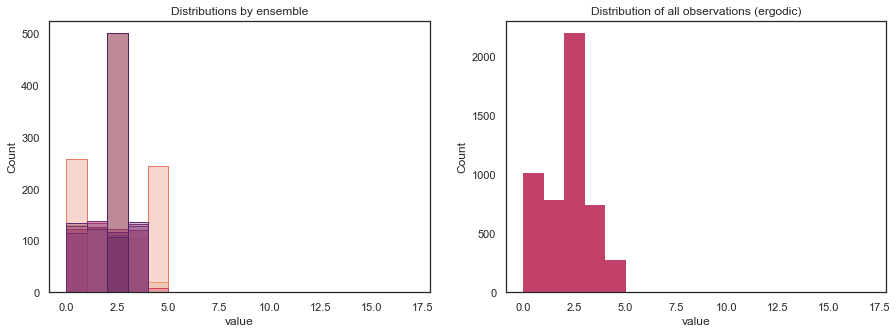

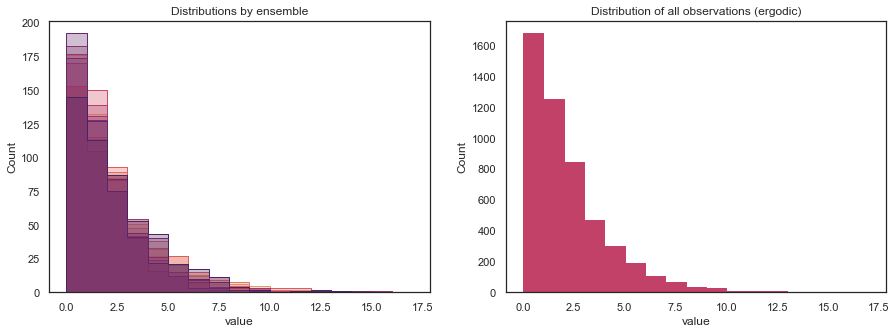

In [26]:
ei, ee = batch(agents=500, temperature=2, timesteps=1000, ensembles=10)

# create initial ee
ei.stats()
ei.plot()

# create end ee
ee.stats()
ee.plot()

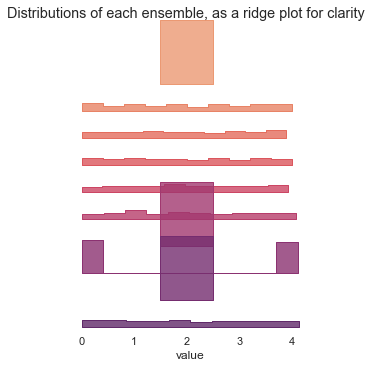

In [28]:
ei.plot(True)

/Users/timjdavey/Projects/complexity/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/timjdavey/Projects/complexity/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


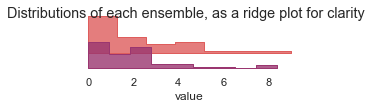

In [5]:
ei, ee = batch(agents=50, temperature=2, timesteps=10, ensembles=2)
ee.plot(True)
